In [81]:
import pandas as pd 
import numpy as np

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Preparing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

# Machine learning
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, confusion_matrix

In [95]:
# Importing data
data = pd.read_csv('../data/processed/final_df.csv')

# columns that do not provide any useful information
data.drop(['Unnamed: 0', 'RGB1', 'RGB2', 'RGB3', 'RGB4'], axis = 1, inplace = True)
data.drop(['RGB1html', 'RGB2html', 'RGB3html', 'RGB4html'], axis = 1, inplace = True)

data.head()

Target = []

for i in data[['melanoma', 'seborrheic_keratosis']].itertuples():
    if int(i[1]) == 1:
        Target.append(1)
    elif int(i[2]) == 1:
        Target.append(2)
    elif int(i[1]) == 0 and i[2] == 0:
        Target.append(3)

data['Target'] = Target

data.drop(['seborrheic_keratosis', 'melanoma', 'help_int_for_colors'], axis = 1, inplace = True)

# Splitting data
data.set_index(['image_id'], inplace = True)

# 80# train 20% test
train_data = data[:120]
test_data = data[120:]

X = train_data.drop('Target', axis = 1)
y = train_data['Target']

In [96]:
# Preprocessing

scaler = StandardScaler()

#scaler.fit_transform(['RGB1_occ', 'RGB2_occ', 'RGB3_occ', 'RGB4_occ', 'border_diff_percent', 'rotation_amount_deg', 'area', 'perimeter'])

X = scaler.fit_transform(X)

In [97]:
# Machine learning

# Initializing possible hyperparameters
param_grid_rbf = {'n_neighbors': [3, 5, 8, 10, 12, 14, 15, 16, 20, 25],  
              'p': [1, 2]}  


# Defining the GridSearch function by the Support Vector Machine method and initialized hyperparameters    
grid = GridSearchCV(KNeighborsClassifier(), param_grid_rbf, return_train_score = True)

# Fitting the grid
grid.fit(X, y) 

# Putting our grid results in a pandas dataframe to visualize
table = pd.DataFrame(grid.cv_results_)
table.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
table.rename(columns = {'mean_test_score': 'mean_val_score'}, inplace = True)
table = table[['params', 'mean_train_score', 'mean_val_score', 'rank_test_score']].head()

table

,params,mean_train_score,mean_val_score,rank_test_score
17,"{'n_neighbors': 20, 'p': 2}",0.685417,0.666667,1
19,"{'n_neighbors': 25, 'p': 2}",0.687500,0.658333,2
9,"{'n_neighbors': 12, 'p': 2}",0.712500,0.650000,3
7,"{'n_neighbors': 10, 'p': 2}",0.720833,0.650000,4
15,"{'n_neighbors': 16, 'p': 2}",0.702083,0.650000,4



Accuracy score is: 17.0%

F1 score is:  4.76 %

Confusion matrix 



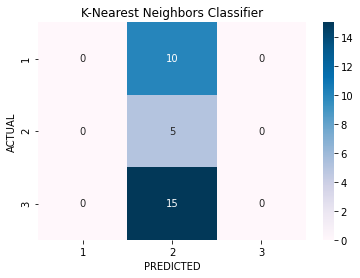

In [107]:
# Test data

# Splitting test data
X_test = test_data.drop('Target', axis = 1)
y_test = test_data['Target']

# Prediction
prediction = grid.predict(X_test)
accuracy_score = round(grid.score(X_test, y_test), 2)

# Visualization
cf_matrix = confusion_matrix(y_test, prediction)
sns_plot = sns.heatmap(cf_matrix, annot=True, cmap='PuBu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.title('K-Nearest Neighbors Classifier')
sns_fig = sns_plot.get_figure()
# sns_fig.savefig('confusion matrices/M3_confusion.png', dpi=300)

# Output
print()
print('Accuracy score is: ' + str(accuracy_score*100) + '%')
print()
print('F1 score is: ', round(f1_score(y_test, prediction, average = 'weighted')*100, 2), '%')
print()
print('Confusion matrix ')
print()
plt.show()